In [2]:
# Import
import math, copy
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import StandardScaler

# Scikit-learn Gradient Descent
Scikit-learn has a gradient descent regression model [sklearn.linear_model.SGDRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDRegressor.html#examples-using-sklearn-linear-model-sgdregressor).  Like the gradient descent implementation as shown below, this model performs best with normalized inputs. [sklearn.preprocessing.StandardScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler) will perform z-score normalization as shown below. Here it is referred to as 'standard score'.

# Cost function
In linear regression with multiple variables, the cost function is a measure on how well our model
is predicting the target values.

The equation for cost function with multiple variable is:
$$J(\mathbf{w},b) = \frac{1}{2m} \sum\limits_{i = 0}^{m-1} (f_{\mathbf{w},b}(\mathbf{x}^{(i)}) - y^{(i)})^2 \nonumber $$ 
 
where 
  $$f_{\mathbf{w},b}(x^{(i)}) = \mathbf{w} \cdot \mathbf{x}^{(i)} + b \nonumber $$
  
In contrast to the cost function with single variable, $\mathbf{w}$ and $\mathbf{x}^{(i)}$ are vectors supporting multiple features.
  
- $f_{\mathbf{w},b}(\mathbf{x}^{(i)})$ is the prediction for sample $i$ using parameters $\mathbf{w},b$.  
- $(f_{\mathbf{w},b}(\mathbf{x}^{(i)}) -y^{(i)})^2$ is the squared difference between the target value and the prediction.   
- These differences are summed over all the $m$ samples and divided by $2m$ to produce the cost, $J(\mathbf{w},b)$.  
- Note that the summation ranges from 0 to m-1 (compatible with python indexing).

Here is the code to compute the cost function with multiple variables:

In [3]:
# Cost function calculator
def compute_cost(X, y, w, b):
    """
    Computes the cost function for linear regression with multiple variables
    Args:
      X (ndarray (m,n)): Data, m examples with n features
      y (ndarray (m,)) : target values
      w (ndarray (n,)) : model parameters 
      b (scalar)       : model parameter
    Returns
      cost (scalar): The total cost
     """
   
    # initialize
    m = X.shape[0] 
    cost = 0
    
    # loop over number of data sets
    for i in range(m):
        f_wb = np.dot(X[i], w) + b
        cost += (f_wb - y[i])**2
    # total cost
    cost = cost / (2 * m)

    return cost

# Gradient of the cost function
From the cost function equation, the gradient of the cost function with respect to $w_{j}$ and $b$ is given
as follows:

\begin{align}
\frac{\partial J(\mathbf{w},b)}{\partial w_{j}}  &= \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{\mathbf{w},b}(\mathbf{x}^{(i)}) - y^{(i)})x^{(i)}_{j} \qquad \forall j = 0, \dots, n-1 \nonumber \\
  \frac{\partial J(\mathbf{w},b)}{\partial b}  &= \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{\mathbf{w},b}(\mathbf{x}^{(i)}) - y^{(i)}) \nonumber \\
\end{align}

- Note that all partial derivatives are computed simultaniously.

Here is the code to compute the gradient of the cost function with multiple variables:

In [4]:
# Cost function gradient calculator
def compute_cost_gradient(X, y, w, b): 
    """
    Computes the gradient of the cost function based on the linear regression model with multiple variables
    Args:
      X (ndarray (m,n)): Data, m examples with n features
      y (ndarray (m,)) : target values
      w (ndarray (n,)) : model parameters  
      b (scalar)       : model parameter
      
    Returns:
      dj_dw (ndarray (n,)): The gradient of the cost w.r.t. the parameters w. 
      dj_db (scalar):       The gradient of the cost w.r.t. the parameter b. 
    """
    m,n = X.shape           # (number of examples, number of features)
    dj_dw = np.zeros((n,))
    dj_db = 0.0

    for i in range(m):                             
        diff = (np.dot(X[i], w) + b) - y[i]   
        for j in range(n):                         
            dj_dw[j] += diff * X[i, j]    
        dj_db += diff                        
    dj_dw = dj_dw / m                                
    dj_db = dj_db / m                                
        
    return dj_dw, dj_db

# Gradient descent
In linear regression with multiple variables, the linear model that predicts $f_{\mathbf{w},b}(\mathbf{x}^{(i)})$ is given as:

$$f_{\mathbf{w},b}(\mathbf{x}^{(i)}) = \mathbf{w} \cdot \mathbf{x}^{(i)} + b \nonumber $$

We utilize input training data to fit the parameters $\mathbf{w}$, $b$ by minimizing a measure of the error between our predictions $f_{\mathbf{w},b}(\mathbf{x}^{(i)})$ and the actual data $y^{(i)}$. The measure is called the $cost$, $J(\mathbf{w},b)$. In training, we measure the cost over all of our training samples $\mathbf{x}^{(i)},y^{(i)}$ by:

$$J(\mathbf{w},b) = \frac{1}{2m} \sum\limits_{i = 0}^{m-1} (f_{\mathbf{w},b}(\mathbf{x}^{(i)}) - y^{(i)})^2 \nonumber $$ 

Using the *gradient descent* method, parameters $\mathbf{w}$, $b$ are updated simultaneously as follows:

\begin{align}
w_{j} &= w_{j} - \alpha \frac{\partial J(\mathbf{w},b)}{\partial w_{j}} \qquad \forall j = 0, \dots, n-1 \nonumber \\ 
b &= b - \alpha \frac{\partial J(\mathbf{w},b)}{\partial b}  \nonumber
\end{align}

where $\alpha$ is the learing rate.

- We repeat the update precedure until the convergence criteria are met. 
- Note that when the gradient is negative, $\mathbf{w}$ or $b$ is decreasing and vice-versa.

Here is the code for gradient decent method with multiple variables:

In [5]:
# Gradient decent method
def gradient_descent(X, y, w_in, b_in, alpha, num_iters, rel_err): 
    """
    Performs gradient descent to fit w,b. Updates w,b by taking 
    num_iters gradient steps with learning rate alpha
    
    Args:
      X (ndarray (m,n))   : Data, m examples with n features
      y (ndarray (m,))    : target values
      w_in (ndarray (n,)) : initial model parameters  
      b_in (scalar)       : initial model parameter
      alpha (float)       : learning rate
      num_iters (int)     : number of iterations to run gradient descent
      rel_err(float)      : relative error in the gradient decent
      
    Returns:
      w (scalar)      : Updated value of parameter after running gradient descent
      b (scalar)      : Updated value of parameter after running gradient descent
      J_history (List): History of cost values
      """
    
    # Initialize
    w = copy.deepcopy(w_in) # avoid modifying global w_in
    
    # An array to store cost J and w's at each iteration primarily for graphing later
    J_history = []
    b         = b_in
    w         = w_in
    rel_diff  = 1.0
    i         = 0
    
    # Loop over number of iterations
    while (i < num_iters) or (rel_diff > rel_err):
        
        # Calculate the gradient and update the parameters using gradient_function
        dj_dw, dj_db = compute_cost_gradient(X, y, w, b)

        # Update Parameters using equation for the gradient decent
        w = w - alpha * dj_dw                            
        b = b - alpha * dj_db                           

        # Save cost J at each iteration
        if i < 100000: # prevent resource exhaustion 
            J_history.append(compute_cost(X, y, w, b))
        # Relative difference
        if i > 0:
            rel_diff = abs(J_history[i]-J_history[i-1])/J_history[i]
        # Print cost every at intervals 10 times or as many iterations if < 10
        if i% math.ceil(num_iters/10) == 0:
            print(f"Itr {i:4}: Cost = {J_history[-1]:8.9f}, rel_diff = {rel_diff:0.9e}")
            
        # Update
        i += 1
 
    # return w and J,w history for graphing
    print(f"Itr {i:4}: Cost = {J_history[-1]:8.9f}, rel_diff = {rel_diff:0.9e}")
    return w, b, J_history

# Feature scaling

Feature scaling, essentially dividing each positive feature by its maximum value, or more generally, rescale each feature by both its minimum and maximum values using (x-min)/(max-min). Both ways normalizes features to the range of -1 and 1, where the former method works for positive features which is simple and the latter method works for any features. There are two recommended feature scaling methods:

- Mean ($\mu$) normalization: 
\begin{align}
    x_i = \frac{x_i - \mu_i}{max - min} \nonumber
\end{align}
- Z-score normalization as discussed below. 

## z-score normalization 
After z-score normalization, all features will have a mean of 0 and a standard deviation of 1.

To implement z-score normalization, adjust your input values by using this formula:

\begin{align}
    x^{(i)}_j = \frac{x^{(i)}_j - \mu_j}{\sigma_j} \nonumber
\end{align}

where $j$ selects a feature or a column in the $\mathbf{X}$ matrix. $µ_j$ is the mean of all the values for feature (j) and $\sigma_j$ is the standard deviation of feature (j).

\begin{align}
\mu_j &= \frac{1}{m} \sum_{i=0}^{m-1} x^{(i)}_j \tag{5} \nonumber \\
\sigma^2_j &= \frac{1}{m} \sum_{i=0}^{m-1} (x^{(i)}_j - \mu_j)^2  \nonumber
\end{align}

- Implementation Note: When normalizing the features, it is important to store the values used for normalization - the mean value and the standard deviation used for the computations. After learning the parameters from the model, we often want to predict the new input we have not seen before. Given a new $x$ value, we must first normalize $x$ using the mean and standard deviation that we had previously computed from the training set.

Here is the code for feature scaling using z-score normalization:

In [6]:
def zscore_normalize_features(X):
    """
    computes  X, zcore normalized by column
    
    Args:
      X (ndarray (m,n))     : input data, m examples, n features
      
    Returns:
      X_norm (ndarray (m,n)): input normalized by column
      mu (ndarray (n,))     : mean of each feature
      sigma (ndarray (n,))  : standard deviation of each feature
    """
    # find the mean of each column/feature
    mu = np.mean(X, axis=0)                 # mu will have shape (n,)
    # find the standard deviation of each column/feature
    sigma = np.std(X, axis=0)                  # sigma will have shape (n,)
    # element-wise, subtract mu for that column from each example, divide by std for that column
    X_norm = (X - mu) / sigma      

    return (X_norm, mu, sigma)
 
# from sklearn.preprocessing import scale
# scale(X_orig, axis=0, with_mean=True, with_std=True, copy=True)

# Plot cost function

In [7]:
def plot_cost(J_hist):
    # plot cost versus iteration  
    fig, (ax1, ax2) = plt.subplots(1, 2, constrained_layout=True, figsize=(12, 4))
    ax1.plot(J_hist)
    ax2.plot(100 + np.arange(len(J_hist[100:])), J_hist[100:])
    ax1.set_title("Cost vs. iteration");  ax2.set_title("Cost vs. iteration (tail)")
    ax1.set_ylabel('Cost')             ;  ax2.set_ylabel('Cost') 
    ax1.set_xlabel('iteration step')   ;  ax2.set_xlabel('iteration step') 
    plt.show()

# Predict

In [8]:
def predict_cost(x, w, b): 
    """
    single predict using linear regression with multiple variable
    Args:
      x (ndarray): Shape (n,) example with multiple features
      w (ndarray): Shape (n,) model parameters   
      b (scalar):             model parameter 
      
    Returns:
      p (scalar):  prediction
    """
    p = np.dot(x, w) + b     
    return p    

# Problem Statement

The training dataset contains three examples (housing price) with four features (size, bedrooms, floors and, age) shown in the table below. 

| Size (sqft) | Number of Bedrooms  | Number of floors | Age of  Home | Price (1000s dollars)  |   
| ----------------| ------------------- |----------------- |--------------|-------------- |  
| 2104            | 5                   | 1                | 45           | 460           |  
| 1416            | 3                   | 2                | 40           | 232           |  
| 852             | 2                   | 1                | 35           | 178           |  


# Plot problem dataset

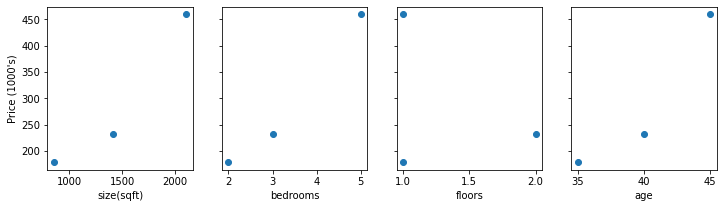

In [9]:
# Load our data set
X_train = np.array([[2104, 5, 1, 45], [1416, 3, 2, 40], [852, 2, 1, 35]])
y_train = np.array([460, 232, 178])
X_features = ['size(sqft)','bedrooms','floors','age']
    
fig,ax=plt.subplots(1, 4, figsize=(12, 3), sharey=True)
for i in range(len(ax)):
    ax[i].scatter(X_train[:,i],y_train)
    ax[i].set_xlabel(X_features[i])
ax[0].set_ylabel("Price (1000's)")
plt.show()

The plot below shows steps involved in Z-score normalization.

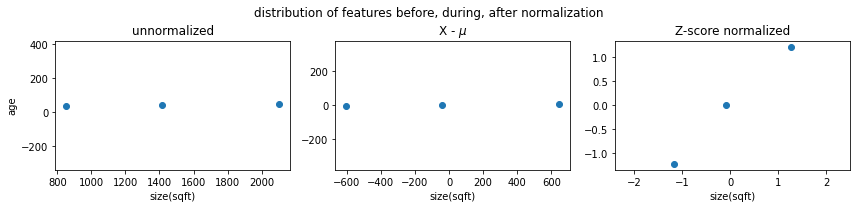

In [10]:
mu     = np.mean(X_train,axis=0)   
sigma  = np.std(X_train,axis=0) 
X_mean = (X_train - mu)
X_norm = (X_train - mu)/sigma      

fig,ax=plt.subplots(1, 3, figsize=(12, 3))
ax[0].scatter(X_train[:,0], X_train[:,3])
ax[0].set_xlabel(X_features[0]); ax[0].set_ylabel(X_features[3]);
ax[0].set_title("unnormalized")
ax[0].axis('equal')

ax[1].scatter(X_mean[:,0], X_mean[:,3])
ax[1].set_xlabel(X_features[0]); ax[0].set_ylabel(X_features[3]);
ax[1].set_title(r"X - $\mu$")
ax[1].axis('equal')

ax[2].scatter(X_norm[:,0], X_norm[:,3])
ax[2].set_xlabel(X_features[0]); ax[0].set_ylabel(X_features[3]);
ax[2].set_title(r"Z-score normalized")
ax[2].axis('equal')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
fig.suptitle("distribution of features before, during, after normalization")
plt.show()

The plot above shows the relationship between two of the training set parameters, "age" and "size(sqft)". *These are plotted with equal scale*. 
- Left: Unnormalized: The range of values or the variance of the 'size (sqft)' feature is much larger than that of age
- Middle: The first step removes the mean or average value from each feature. This leaves features that are centered around zero. It's difficult to see the difference for the 'age' feature, but 'size (sqft)' is clearly around zero.
- Right: The second step divides by the variance. This leaves both features centered at zero with a similar scale.

# Run example with gradient descent and sklearn

In [13]:
def main():
    # initialize parameters
    w_init = np.zeros(4,)
    b_init = 0.0

    # some gradient descent settings
    num_iters = 1000
    alpha     = 5.0e-3
    rel_err   = 1.0e-2
    
    # normalize the original features
    X_norm, X_mu, X_sigma = zscore_normalize_features(X_train)
    
    # run gradient descent
    w_final, b_final, J_hist = gradient_descent(X_norm, y_train, w_init, b_init, alpha, num_iters, rel_err)
    print(f"(J, w, b) found by gradient descent: ({J_hist[-1]:0.7f}, {w_final}, {b_final:0.7f})")
    print("--------------------------------------------------------------------")
    
    m,_ = X_norm.shape
    for i in range(m):
        print(f"i: {i:2d}, prediction: {predict_cost(X_norm[i], w_final, b_final):0.6f}, target value: {y_train[i]}")
    print("--------------------------------------------------------------------")
        
    # Sklearn normalize the orignal features
    scaler = StandardScaler()
    X_norm_Sklearn = scaler.fit_transform(X_train)
    
    # Create and fit the regression model (Sklearn)
    sgdr = SGDRegressor(max_iter=10000, alpha=5.0e-3)
    sgdr.fit(X_norm_Sklearn, y_train)
    print(sgdr)
    print(f"(Sklearn) number of iterations completed: {sgdr.n_iter_}, number of weight updates: {sgdr.t_}")
    
    # View parameters
    b_norm_sklearn = sgdr.intercept_
    w_norm_sklearn = sgdr.coef_
    print(f"model parameters:                   w: {w_norm_sklearn}, b:{b_norm_sklearn}")
    
    # make a prediction using sgdr.predict()
    y_pred_sgd = sgdr.predict(X_norm_Sklearn)
    # make a prediction using w,b. 
    y_pred = np.dot(X_norm_Sklearn, w_norm_sklearn) + b_norm_sklearn  
    print(f"prediction using np.dot() and sgdr.predict match: {(y_pred == y_pred_sgd).all()}")

    print(f"Prediction on training set:\n{y_pred[:4]}" )
    print(f"Target values \n{y_train[:4]}")
    
if __name__ == '__main__':
    main()

Itr    0: Cost = 48883.733832062, rel_diff = 1.000000000e+00
Itr  100: Cost = 15742.217933301, rel_diff = 1.051826686e-02
Itr  200: Cost = 5668.534605092, rel_diff = 1.013651444e-02
Itr  300: Cost = 2074.670978492, rel_diff = 1.008431454e-02
Itr  400: Cost = 761.002571748, rel_diff = 1.007730290e-02
Itr  500: Cost = 279.223350310, rel_diff = 1.007635873e-02
Itr  600: Cost = 102.455388819, rel_diff = 1.007622697e-02
Itr  700: Cost = 37.594165218, rel_diff = 1.007620400e-02
Itr  800: Cost = 13.794522059, rel_diff = 1.007619563e-02
Itr  900: Cost = 5.061662379, rel_diff = 1.007618925e-02
Itr 1000: Cost = 1.857291001, rel_diff = 1.007618320e-02
Itr 1100: Cost = 0.681501779, rel_diff = 1.007617723e-02
Itr 1200: Cost = 0.250065793, rel_diff = 1.007617131e-02
Itr 1300: Cost = 0.091757556, rel_diff = 1.007616545e-02
Itr 1400: Cost = 0.033668955, rel_diff = 1.007615964e-02
Itr 1500: Cost = 0.012354287, rel_diff = 1.007615388e-02
Itr 1600: Cost = 0.004533211, rel_diff = 1.007614817e-02
Itr 1700: